<a href="https://colab.research.google.com/github/LaXnZ/LaXnZ/blob/main/PCA_v1_0_for_StarCraft_II_Replay_Analysis_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading the dataset
file_path = '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/StarCraft II Replay Analysis.csv'
df = pd.read_csv(file_path)

# getting all the numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# excluding categorical columns
columns_to_exclude = ['GameID', 'LeagueIndex', 'MaxTimeStamp']
numeric_columns_filtered = [col for col in numeric_columns if col not in columns_to_exclude]


print("All Numeric Columns in the Dataset:")
print(numeric_columns)

print("\nFiltered Numeric Columns for PCA (Excluding Irrelevant Ones):")
print(numeric_columns_filtered)

print("\nExcluded Columns:")
print(columns_to_exclude)

All Numeric Columns in the Dataset:
['GameID', 'LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilityUsed', 'MaxTimeStamp']

Filtered Numeric Columns for PCA (Excluding Irrelevant Ones):
['Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilityUsed']

Excluded Columns:
['GameID', 'LeagueIndex', 'MaxTimeStamp']


In [ ]:
# scaling the selected numeric columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns_filtered])

# applying vector normalization to each row in the scaled dataset
normalized_data = scaled_data / np.linalg.norm(scaled_data, axis=1, keepdims=True)

# creating a dataframe for the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns_filtered)

# displaying the normalized dataset
print("Vector Normalized Dataset for PCA:")
print(normalized_df.head())

# saving the normalized dataset
output_path = '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/Vector_Normalized_Dataset_for_PCA.csv'
normalized_df.to_csv(output_path, index=False)
print(f"\nThe vector-normalized dataset has been saved as '{output_path}'.")

# verifying the normalization by checking row norms
row_norms = np.linalg.norm(normalized_data, axis=1)
print("\nNorm of each row (should be 1):")
print(row_norms[:10])  # display norms for only the first 10 rows

# verifying the mean and standard deviation for scaled data before normalization
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns_filtered)
print("\nMean of scaled data (before normalization):")
print(scaled_df.mean(axis=0))

print("\nStandard Deviation of scaled data (before normalization):")
print(scaled_df.std(axis=0))

# checking column-wise statistics after vector normalization
print("\nMean of data after vector normalization:")
print(normalized_df.mean(axis=0))

print("\nStandard Deviation of data after vector normalization:")
print(normalized_df.std(axis=0))


Vector Normalized Dataset for PCA:
        Age  HoursPerWeek  TotalHours       APM  SelectByHotkeys  \
0  0.397868     -0.154499    0.036826  0.160551        -0.046362   
1  0.129148     -0.198513    0.093717  0.094248        -0.075638   
2  0.622654     -0.154939   -0.013769 -0.284248        -0.189748   
3 -0.228431      0.124041   -0.011743 -0.065982        -0.224211   
4  0.501720     -0.100726   -0.005420  0.022935        -0.122008   

   AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
0        -0.213915      -0.031187        0.021759            0.004048   
1        -0.203829       0.109512        0.474148            0.047957   
2        -0.052984      -0.137412        0.369253            0.061530   
3        -0.258886      -0.453777       -0.098461            0.150129   
4        -0.041917      -0.107378       -0.120823            0.508909   

   NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0      0.436806       -0.140252      -0.371745     -0

In [19]:
# Step: Handle missing values before calculating variances
# Fill missing values with the mean for each numeric column
df[numeric_columns_filtered] = df[numeric_columns_filtered].fillna(df[numeric_columns_filtered].mean())

# Reapply scaling after handling missing values
scaled_data = scaler.fit_transform(df[numeric_columns_filtered])

# Recalculate variance for each feature
feature_variances = np.var(scaled_data, axis=0)  # Variance for each column in scaled data

# Create a DataFrame to display feature variances
variance_df = pd.DataFrame({
    'Feature': numeric_columns_filtered,
    'Variance': feature_variances
}).sort_values(by='Variance', ascending=False)

# Display the updated feature variances
print("Updated Feature Variances (After Handling Missing Values):")
print(variance_df)

# Save the updated variance data for review
updated_output_path_variance = '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/Updated_Feature_Variances.csv'
variance_df.to_csv(updated_output_path_variance, index=False)
print(f"\nUpdated feature variances have been saved as '{updated_output_path_variance}'.")


Updated Feature Variances (After Handling Missing Values):
               Feature  Variance
13    TotalMapExplored       1.0
3                  APM       1.0
10      GapBetweenPACs       1.0
0                  Age       1.0
12        ActionsInPAC       1.0
17  ComplexAbilityUsed       1.0
4      SelectByHotkeys       1.0
11       ActionLatency       1.0
2           TotalHours       1.0
1         HoursPerWeek       1.0
14         WorkersMade       1.0
15     UniqueUnitsMade       1.0
5      AssignToHotkeys       1.0
8   MinimapRightClicks       1.0
6        UniqueHotkeys       1.0
7       MinimapAttacks       1.0
16    ComplexUnitsMade       1.0
9         NumberOfPACs       1.0

Updated feature variances have been saved as '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/Updated_Feature_Variances.csv'.


In [20]:
# Step: Apply PCA to the standardized dataset
# Initialize PCA to create as many components as there are features
pca = PCA(n_components=len(numeric_columns_filtered))
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the principal components
pc_columns = [f"PC{i+1}" for i in range(len(numeric_columns_filtered))]
pca_df = pd.DataFrame(principal_components, columns=pc_columns)

# Display the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_
explained_variance_df = pd.DataFrame({
    'Principal Component': pc_columns,
    'Explained Variance Ratio': explained_variance,
    'Cumulative Variance': explained_variance.cumsum()
})

# Save the PCA results for reference
output_path_pca = '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/PCA_Components.csv'
pca_df.to_csv(output_path_pca, index=False)
print(f"\nPCA components dataset has been saved as '{output_path_pca}'.")

# Save explained variance information
output_path_variance = '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/PCA_Explained_Variance.csv'
explained_variance_df.to_csv(output_path_variance, index=False)
print(f"\nExplained variance information has been saved as '{output_path_variance}'.")

# Display the top components and their explained variance
print("\nExplained Variance by Principal Components:")
print(explained_variance_df.head())

# Provide reasons for creating principal components
reasons = []
for i, var in enumerate(explained_variance, start=1):
    reasons.append(f"PC{i}: Explains {var*100:.2f}% of the variance, combining features to represent key patterns in the data.")

# Print the reasons for each principal component
print("\nReasons for Each Principal Component:")
for reason in reasons:
    print(reason)



PCA components dataset has been saved as '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/PCA_Components.csv'.

Explained variance information has been saved as '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/PCA_Explained_Variance.csv'.

Explained Variance by Principal Components:
  Principal Component  Explained Variance Ratio  Cumulative Variance
0                 PC1                  0.260594             0.260594
1                 PC2                  0.113104             0.373698
2                 PC3                  0.082930             0.456628
3                 PC4                  0.072725             0.529352
4                 PC5                  0.061275             0.590627

Reasons for Each Principal Component:
PC1: Explains 26.06% of the variance, combining features to represent key patterns in the data.
PC2: Explains 11.31% of the variance, combining features to represent key patterns in the data.
PC3: Explains 8.29% of the variance, combining f

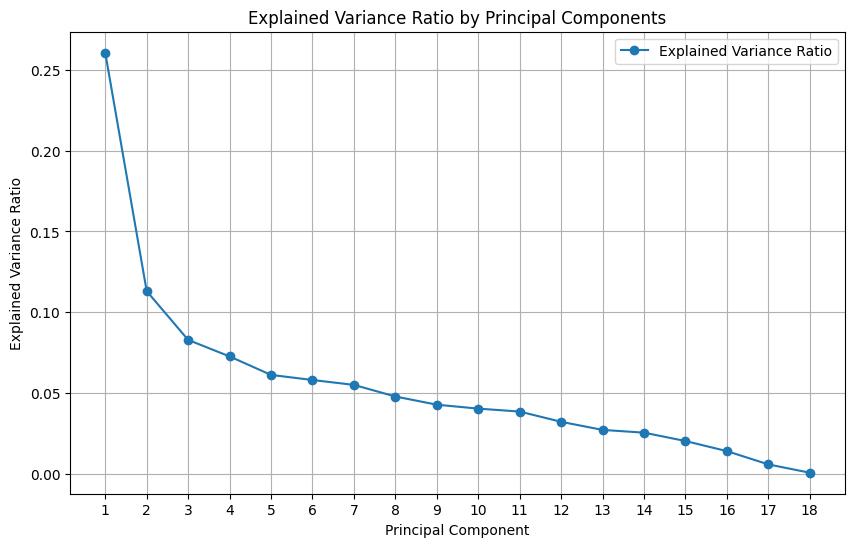

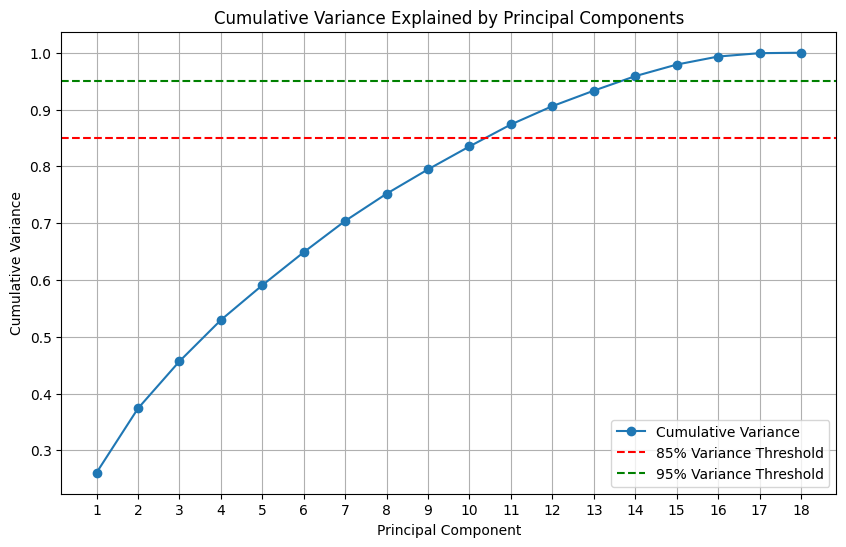

In [22]:
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.legend()
plt.show()

# Plot cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', label='Cumulative Variance')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.axhline(y=0.85, color='r', linestyle='--', label='85% Variance Threshold')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance Threshold')
plt.grid(True)
plt.legend()
plt.show()


In [23]:
# Principal Components to Keep Based on Cumulative Variance

# defining the desired variance threshold (e.g., 85%)
desired_variance_threshold = 0.85

# identifying the number of components to retain
components_to_keep = np.argmax(explained_variance.cumsum() >= desired_variance_threshold) + 1

# displaying the number of components to retain
print(f"Number of Principal Components to retain for {desired_variance_threshold*100}% variance: {components_to_keep}")

# creating a reduced dataset with the selected principal components
reduced_pca_df = pca_df.iloc[:, :components_to_keep]

# saving the reduced PCA dataset for further analysis
reduced_output_path = '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/Reduced_PCA_Dataset.csv'
reduced_pca_df.to_csv(reduced_output_path, index=False)
print(f"\nThe reduced PCA dataset with {components_to_keep} components has been saved as '{reduced_output_path}'.")

# displaying the reduced PCA dataset
print("\nReduced PCA Dataset (Top Rows):")
print(reduced_pca_df.head())


Number of Principal Components to retain for 85.0% variance: 11

The reduced PCA dataset with 11 components has been saved as '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/Reduced_PCA_Dataset.csv'.

Reduced PCA Dataset (Top Rows):
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.532523 -0.929846 -1.193731  1.027462 -1.006070 -1.218452  0.804237   
1  1.096446  0.350556 -0.364152  0.087516 -0.965826 -0.797539  0.533616   
2 -1.744232 -0.550658 -0.249190  1.655174 -1.563968  0.330430  0.062600   
3 -0.509858 -1.539906 -0.414985  0.372491  0.909495 -0.871390 -0.012354   
4  0.027317  0.996248  2.530289  2.812868 -0.514440 -0.978692  0.772041   

        PC8       PC9      PC10      PC11  
0 -0.365238  0.982556  0.831429 -0.033046  
1  0.922993 -0.030633 -0.346932 -0.461112  
2  0.961276  0.496861  0.055641 -0.006130  
3 -0.046350  0.167522 -0.992196  0.736336  
4 -0.983991  1.331688  0.324258  1.773887  


Cumulative Variance Explained by the first 11 components: 0.87

PCA Components Matrix (Relationships between PCs and original features):
           Age  HoursPerWeek  TotalHours       APM  SelectByHotkeys  \
PC1  -0.114305      0.129500    0.030533  0.423806         0.319850   
PC2   0.072236     -0.045415    0.009520  0.004422         0.069729   
PC3   0.063219     -0.038756   -0.064680 -0.047057        -0.159832   
PC4   0.311164     -0.072090    0.005814  0.114917         0.091133   
PC5  -0.584494      0.597423    0.193825  0.080258         0.064685   
PC6   0.216710      0.170777    0.329637  0.098141         0.404107   
PC7   0.066239     -0.261813    0.901308 -0.001353        -0.080760   
PC8   0.042355      0.467916    0.126392 -0.213199        -0.240950   
PC9   0.610427      0.495422    0.035283 -0.051845        -0.186190   
PC10  0.247750      0.143387   -0.131289  0.227992         0.374672   
PC11  0.164240      0.161969   -0.014686 -0.010882        -0.012847   

      Assi

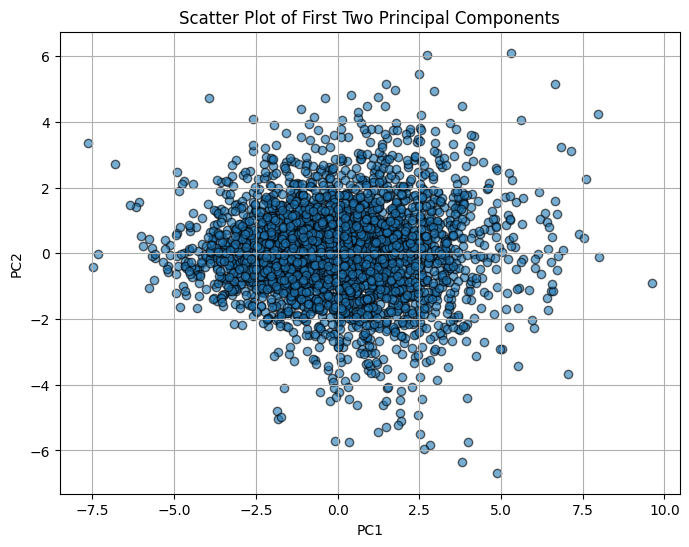

In [28]:
# 1: checking the cumulative variance explained by the selected components
print(f"Cumulative Variance Explained by the first {components_to_keep} components: {explained_variance.cumsum()[components_to_keep - 1]:.2f}")

# 2: comparing the relationships between original features and principal components
# PCA Components Matrix
pca_components_df = pd.DataFrame(pca.components_[:components_to_keep],
                                 columns=numeric_columns_filtered,
                                 index=[f"PC{i+1}" for i in range(components_to_keep)])
print("\nPCA Components Matrix (Relationships between PCs and original features):")
print(pca_components_df)

# 3: visualizing PCs to check clustering or patterns
# scatter plot for the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(reduced_pca_df["PC1"], reduced_pca_df["PC2"], alpha=0.6, edgecolor='k')
plt.title("Scatter Plot of First Two Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()